### EDA on the Dataset

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv("./datasets/Training Data.csv", sep=',')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df = df.drop('Id', axis=1)
print("Features : ",df.columns.tolist())

# data types
df.dtypes

Features :  ['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

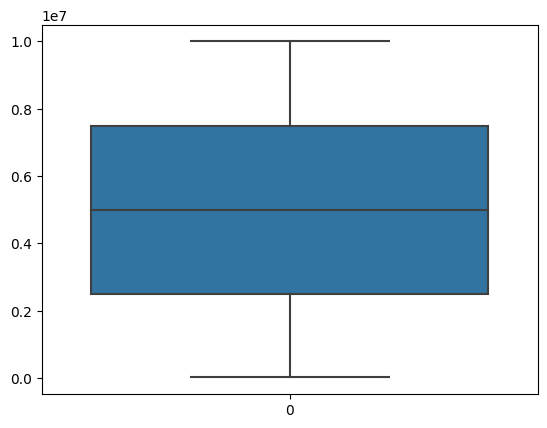

In [6]:
# Checking Outliers in Income

df.Income.describe()
sns.boxplot(df.Income)
plt.show()

### Data Preprocessing

In [7]:
# Encoding categories
df_en = df.copy()
encoder = LabelEncoder()

df_en = df_en.drop('CITY',axis=1)
df_en = df_en.drop('STATE',axis=1)

categorical = ['Married/Single', 'House_Ownership', 'Car_Ownership','Profession']

for feature in categorical:
    df_en[feature] = encoder.fit_transform(df_en[feature])

df_en.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1


In [8]:
df_en.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

In [11]:
df_en.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,14.000000,14.000000,1.000000


As the dataset is not on the same scale we'll have to scale it.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in [df_en.columns]:
    df_en[i] = scaler.fit_transform(df_en[i])

df_en.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.897905,0.945861,0.301587,0.505535,0.452420,0.499448,0.123000
std,0.288130,0.294204,0.300129,0.302774,0.195940,0.458948,0.294571,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,1.000000,1.000000,0.000000,0.260000,0.214286,0.250000,0.000000
50%,0.499557,0.500000,0.500000,1.000000,1.000000,0.000000,0.520000,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,1.000000,1.000000,1.000000,0.760000,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hence, all the features are now on the same scale.

### Modeling

In [62]:
# Setting up X & Y

X = df_en.drop(columns='Risk_Flag')
y = df_en['Risk_Flag']

y.shape

(251998,)

In [66]:
def useModel(model, X_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Classification report : ")
    print(classification_report(y_test, y_pred, zero_division=0))
    print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
    print('F1 Score: ', round(f1_score(y_test, y_pred), 2))
    

In [67]:
# Using Linear Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
useModel(model, X, y)


The Classification report : 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     66343
         1.0       0.00      0.00      0.00      9257

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

Accuracy score:  0.88
F1 Score:  0.0


In [68]:
# Using K-Nearest-Neighborhood

from sklearn.neighbors import KNeighborsClassifier

useModel(KNeighborsClassifier(n_neighbors=3), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     66343
         1.0       0.54      0.49      0.51      9257

    accuracy                           0.89     75600
   macro avg       0.73      0.72      0.72     75600
weighted avg       0.88      0.89      0.88     75600

Accuracy score:  0.89
F1 Score:  0.51
